<a href="https://colab.research.google.com/github/Khushi-Kumari947/Deep-Learning/blob/main/training_MLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

In [35]:
import kagglehub
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.


In [36]:
path

'/kaggle/input/credit-card-customer-churn-prediction'

In [37]:
import os

os.listdir(path)

['Churn_Modelling.csv']

In [38]:


df = pd.read_csv(os.path.join(path, "Churn_Modelling.csv"))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [42]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [43]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [44]:
df_new=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [45]:
df_new.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8490,746,France,Male,48,5,165282.42,1,1,0,153786.46,1
7762,850,France,Female,34,2,0.00,2,0,0,51919.04,0
1149,655,France,Male,38,4,0.00,2,0,0,110527.71,0
2028,458,France,Female,39,9,0.00,2,1,0,116343.09,0
772,589,France,Male,32,2,0.00,2,0,1,9468.64,0


In [46]:
df_new=pd.get_dummies(df_new,columns=['Geography','Gender'],drop_first=True)

In [47]:
X=df_new.drop(columns=['Exited'])
y=df_new['Exited']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [49]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [51]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [52]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [53]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model2=Sequential()
model2.add(Dense(11,activation='relu',input_dim=11))
model2.add(Dense(11,activation='relu',input_dim=11))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
model2.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']

)

In [57]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam'

)

In [80]:
history=model2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6512 - loss: 0.6244 - val_accuracy: 0.7975 - val_loss: 0.4827
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7950 - loss: 0.4723 - val_accuracy: 0.8019 - val_loss: 0.4508
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.4367 - val_accuracy: 0.8062 - val_loss: 0.4346
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8137 - loss: 0.4170 - val_accuracy: 0.8150 - val_loss: 0.4209
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8238 - loss: 0.4093 - val_accuracy: 0.8231 - val_loss: 0.4069
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8400 - loss: 0.3856 - val_accuracy: 0.8319 - val_loss: 0.3950
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8437 - loss: 0.3830 - val_accuracy: 0.8413 - val_loss: 0.3812
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3692 - val_accu

In [58]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8008
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6345
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5418
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4905
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4754
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4589
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4571
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4482
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4413
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4332


In [59]:
model.layers[0].get_weights()

[array([[ 0.07266776, -0.07650249,  0.22430493],
        [ 0.46677396, -1.4766434 , -2.2365248 ],
        [-0.42923072,  0.14989845, -0.07486486],
        [-0.20613036, -0.7331856 , -0.31506258],
        [ 0.17141551,  0.15632504, -0.03085707],
        [ 0.3408481 , -0.04804665,  0.03026548],
        [-0.7424366 ,  1.0167212 ,  0.64106953],
        [-0.45493686, -0.09481201, -0.01964677],
        [ 0.42973223, -0.37447414, -0.6873754 ],
        [-0.4225734 ,  0.1750723 ,  0.02941736],
        [-0.42920968,  0.77206665,  0.34894022]], dtype=float32),
 array([-0.3490301 ,  0.47904074,  0.5482337 ], dtype=float32)]

In [81]:
y_log=model2.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [82]:
y_pred=np.where(y_log>0.5,1,0)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8625

In [62]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [64]:
y_pred=np.where(y_log>0.5,1,0)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7925

In [84]:
import matplotlib.pyplot as plt

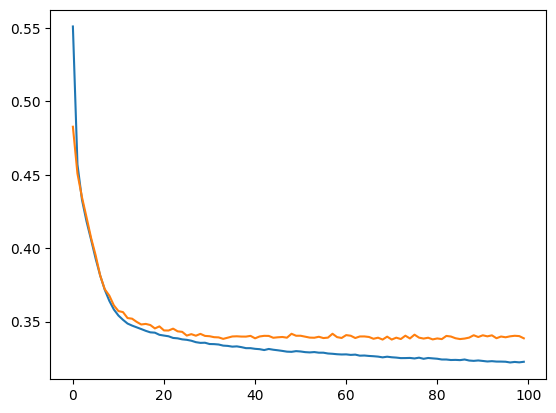

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

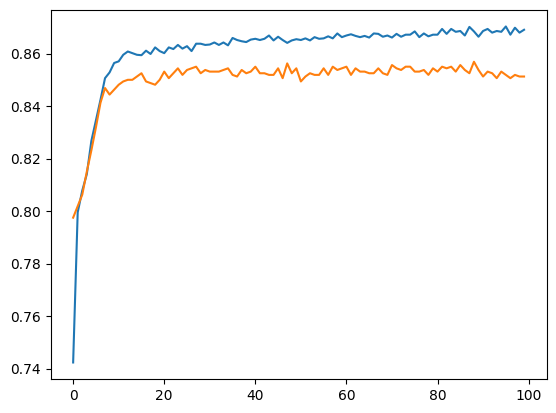

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])